In [1]:
!pip install -U fastai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 77.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 61.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
!pip install -U duckduckgo_search fastcore
!pip install -U fastcore fastai fastdownload

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.1/78.1 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 54.4 MB/s eta 0:00:00
  Attempting uninstall: fastcore
    Found existing installation: fastcore 1.7.29
    Uninstalling fastcore-1.7.29:
      Successfully uninstalled fastcore-1.7.29
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.7.19 requires fastcore<1.8,>=1.5.29, but you have fastcore 1.8.1 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.2/84.2 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: fastcore
    Found existing installation: fastcore 1.8.1
    Uninstalling fastcore-1.8.1:
      Successfully uninstalled fastcore-1.8.1


In [17]:
from duckduckgo_search import DDGS
from fastcore.all import *
from fastcore.all import L

In [18]:
import time, json

In [19]:
def search_images(keywords, max_images = 200):
  with DDGS() as ddgs:
    results = ddgs.images(keywords, max_results = max_images)
    return L(results).itemgot('image')

In [20]:
from fastai.vision.all import *
from fastdownload import download_url
from PIL import Image

In [23]:
car_image = search_images("cars", max_images=1)
dest = 'car.jpg'
download_url(car_image[0], dest, show_progress=False)

Path('car.jpg')

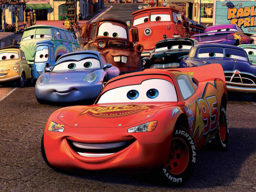

In [26]:
im_of_car = Image.open(dest)
im_of_car.to_thumb(256, 256)

In [39]:
cars = "BMW", "Bently", "Alfa Romeo", "Audi", "Lamborgini", "Bugati"
path = Path("Cars")

for o in cars:
  dest = (path/o)
  dest.mkdir(exist_ok=True, parents = True)
  urls = search_images(f'{o} images', max_images= 50)
  download_images(dest, urls = urls)
  resize_images(path/o, max_size = 400, dest = path/o)

In [41]:
failed= verify_images(get_image_files(path))
for f in failed:
    if f.is_file():
        f.unlink()
len(failed)

10

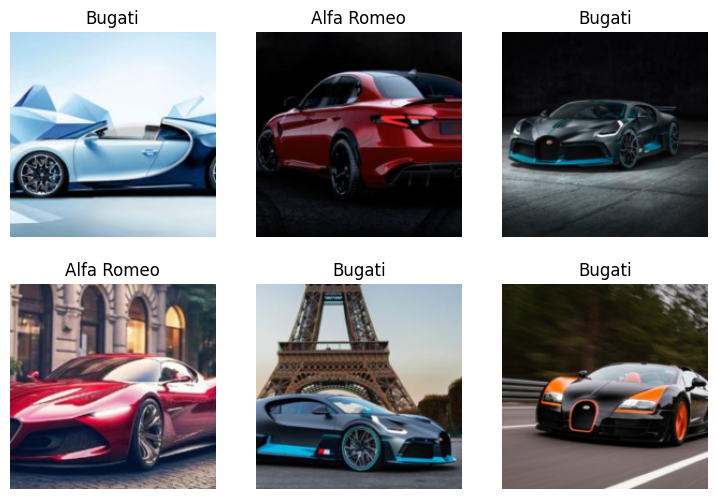

In [42]:
# Data loading
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),                # Images and labels
    get_items=get_image_files,                         # Get all image files
    splitter=RandomSplitter(valid_pct=0.2, seed=42),   # Train/validation split
    get_y=parent_label,                                # Label = parent folder name
    item_tfms=[Resize(192, method='squeeze')]           # Resize images to 192x192
).dataloaders(path, bs=50)                             # Batch size = 50

# Show some training images
dls.show_batch(max_n=6)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(100)

epoch,train_loss,valid_loss,error_rate,time
0,2.856392,2.168446,0.670886,00:01


epoch,train_loss,valid_loss,error_rate,time
0,1.594220,1.433728,0.481013,00:01
1,1.488168,1.132782,0.392405,00:01
2,1.373786,0.960817,0.303797,00:01
3,1.196858,0.860066,0.341772,00:02
4,1.073373,0.777129,0.291139,00:01
5,0.931060,0.724853,0.291139,00:01
6,0.823840,0.680873,0.253165,00:01
7,0.724586,0.643467,0.202532,00:01


In [48]:
predict,_,probs = learn.predict(PILImage.create('car.jpg'))
print(f'This is a {predict}')
print(f"The probability that this is a {[predict]} is :{(probs[0])*100:.4f}")

This is a BMW
The probability that this is a ['BMW'] is :1.4129
